# Работа с датасетом о стоймости домов #

Ссылка на датасет: https://www.kaggle.com/shree1992/housedata

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("./datasets/housedata/data.csv")

**Данные в датасете содержат следующие признаки:**

- date: дата объявления
- price: стоймость в долларах США (целевой признак)
- bedrooms: кол-во спален
- bathrooms: кол-во ванных
- sqft_living: жилая площадь (кв. фт.)
- sqft_lot: площадь участка (кв. фт.)
- floors: количество этажей
- waterfront: около водоема (0,1)
- view: количество сторон дома из которых хороший вид (от 0 до 4) 
- condition: состояние дома от 1(плохо) до 5(отлично)
- sqft_above: жилая площадь на первом этаже и выше (кв. фт)
- sqft_basement: жилая площадь ниже 1 этажа (кв. фт)
- yr_built: год постройки
- yr_renovated: год реновации
- street: улица
- city: город
- statezip: почтовый индекс
- country: страна

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.shape

(4600, 18)

In [5]:
data.sqft_above.value_counts()

1010    47
1200    47
1300    45
1140    44
1320    43
        ..
2238     1
1341     1
3380     1
2286     1
4110     1
Name: sqft_above, Length: 511, dtype: int64

## Подготовка данных ##

**Пропуски**<br>

In [6]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
data[data==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

Видно что есть некотрое число строк с нулевой ценой и с нулевым числом ванных и спален. Удаляем эти строки

In [8]:
data = data[data['price'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['bathrooms'] != 0]

In [9]:
data.date

0       2014-05-02 00:00:00
1       2014-05-02 00:00:00
2       2014-05-02 00:00:00
3       2014-05-02 00:00:00
4       2014-05-02 00:00:00
               ...         
4595    2014-07-09 00:00:00
4596    2014-07-09 00:00:00
4597    2014-07-09 00:00:00
4598    2014-07-10 00:00:00
4599    2014-07-10 00:00:00
Name: date, Length: 4549, dtype: object

Проверим также что признак country несет в себе какой-то смысл

In [10]:
data.country.value_counts()

USA    4549
Name: country, dtype: int64

Данный признак содержит только одно значение, следовательно он бесполезен - удаляем его

In [11]:
data = data.drop(columns=['country'])

**Удалим выбросы**

In [12]:
def drop_outliers(indexes):
    global data
    for index in indexes:
        Q1 = data[index].quantile(0.25)
        Q3 = data[index].quantile(0.75)
        IQR =Q3- Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        data = data[(data[index]>=lower_limit)&(data[index]<=upper_limit)]
        
drop_outliers(["price","sqft_living","sqft_lot","sqft_above", "sqft_basement"])
data.shape

(3648, 17)

**Преобразование признаков типа object к числовым типам**<br>
Посмотрим типы у признаков

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3648 non-null   object 
 1   price          3648 non-null   float64
 2   bedrooms       3648 non-null   float64
 3   bathrooms      3648 non-null   float64
 4   sqft_living    3648 non-null   int64  
 5   sqft_lot       3648 non-null   int64  
 6   floors         3648 non-null   float64
 7   waterfront     3648 non-null   int64  
 8   view           3648 non-null   int64  
 9   condition      3648 non-null   int64  
 10  sqft_above     3648 non-null   int64  
 11  sqft_basement  3648 non-null   int64  
 12  yr_built       3648 non-null   int64  
 13  yr_renovated   3648 non-null   int64  
 14  street         3648 non-null   object 
 15  city           3648 non-null   object 
 16  statezip       3648 non-null   object 
dtypes: float64(4), int64(9), object(4)
memory usage: 513

Приведем значение времени к формату **timestamp**

In [14]:
import time
import datetime

data.date = pd.Series([time.mktime(datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").timetuple()) for i in data.date], index=data.index)

Переведем остальные нечисловые признаки к целочисленному типу

In [15]:
from sklearn.preprocessing import LabelEncoder


for i in ["street", "city", "statezip"]:
    data[i]=LabelEncoder().fit_transform(data[i])

data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,1.398974e+09,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1206,35,61
2,1.398974e+09,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,1786,18,25
3,1.398974e+09,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3361,3,7
4,1.398974e+09,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,3441,30,30
5,1.398974e+09,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,2744,34,53


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3648 non-null   float64
 1   price          3648 non-null   float64
 2   bedrooms       3648 non-null   float64
 3   bathrooms      3648 non-null   float64
 4   sqft_living    3648 non-null   int64  
 5   sqft_lot       3648 non-null   int64  
 6   floors         3648 non-null   float64
 7   waterfront     3648 non-null   int64  
 8   view           3648 non-null   int64  
 9   condition      3648 non-null   int64  
 10  sqft_above     3648 non-null   int64  
 11  sqft_basement  3648 non-null   int64  
 12  yr_built       3648 non-null   int64  
 13  yr_renovated   3648 non-null   int64  
 14  street         3648 non-null   int64  
 15  city           3648 non-null   int64  
 16  statezip       3648 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 513.0 KB


Из полученного можем видеть, что все категориальные признаки из строчных заменились на числовые 

## Визуализация данных ##

**Отобразим корреляцию признаков с помощью тепловой карты**<br>
Единственное уберем категориальные признаки, так как в данном случае они не несут никакого смысла

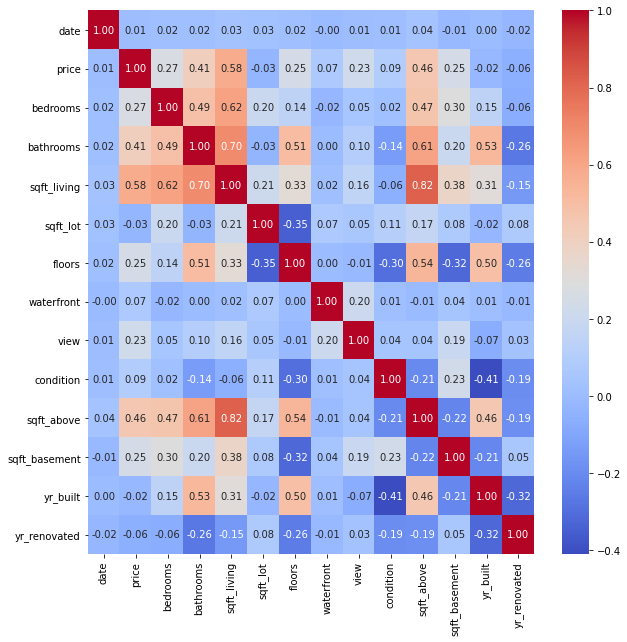

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 

features = list(data.columns).copy()

non_ordinal_attributes = ["street", "city", "statezip"]

for i in non_ordinal_attributes:
    features.remove(i)


sns.heatmap(data[features].corr(), annot=True, fmt=".2f", cmap= 'coolwarm');

Из построенной тепловой карты следует, что цена на дом неплохо коллерирует со следующими признаками:  bedrooms(коэффициент корреляции 0.27), bathrooms (0.41), sqft_living (0.58), floors (0.25), view (0.23), sqft_above (0.46), sqft_basement(0.25).<br> Все это объективно важные параметры влияющие на итоговую цену дома. <br> Неожиданно, что цена на дом в данном датасете не зависит от даты объявления

## Разделение датасета на обучающую и тестовую выборку ##

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(["price"], axis=1), data["price"], random_state = 100, test_size = 0.1)

## Линейная регрессия ##

**Подберем подходящую модель на обучающей выборке**

In [19]:
linreg = LinearRegression().fit(x_train,y_train)

**Точность предсказания**

In [22]:
round(linreg.score(x_test, y_test), 3)

0.508

**Пример работы модели**
<br>выберем случайным образом строку из датасета

In [26]:
rand_row = data.sample()
rand_row

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
181,1.399320e+09,460000.0,2.0,2.25,1230,929,2.0,0,0,3,1020,210,2004,2003,3,34,52


предскажем цену по получившейся модели

In [27]:
linreg.predict(rand_row.drop("price", axis=1))[0]

377966.38655701093